In [ ]:
#Base Script

In [1]:
import pandas as pd
import matplotlib as mb
import sklearn as sk
import scipy as sc
import matplotlib.pyplot as plt
import numpy as np
import chart_studio.plotly as py
from matplotlib import pyplot as plt
from plotly import graph_objects as go
from bokeh.plotting import output_notebook, output_file, figure, show, ColumnDataSource
from bokeh.models import HoverTool
import seaborn as sns

#Read CSV data
pd.set_option('display.max_columns', 999)
dataPCA = pd.read_csv('FA&PCA.csv',delimiter=',', header =0,names=['Litostratygrafia','LLS','LLD','RHOB','Pe','NPHI','GR','GKUT','GRKT','POTA','THOR','URAN','DCAL','DTP','DTSX','DKER','VCBW','VWF','PHIE','PHIG','DPEQ','DSEQ','RHEQ'])
label = ['Litostratygrafia']
features = ['LLS','LLD','RHOB','Pe','NPHI','GR','GKUT','GRKT','POTA','THOR','URAN','DCAL','DTP','DTSX','DKER','VCBW','VWF','PHIE','PHIG','DPEQ','DSEQ','RHEQ']
#x = dataPCA.loc[:,features].values
#y = dataPCA.loc[:,['Litostratygrafia']].values
#y=dataPCA.iloc[:,1:23].values
#x=dataPCA.iloc[:,0].values 
x=dataPCA.iloc[:,1:23].values
y=dataPCA.iloc[:,0].values
print(x.shape)
print(y.shape)

(2480, 22)
(2480,)


C:\Users\Kacpero\Anaconda3\envs\orange3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

C:\Users\Kacpero\Anaconda3\envs\orange3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

C:\Users\Kacpero\Anaconda3\envs\orange3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To contr

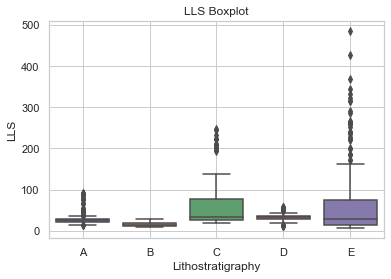

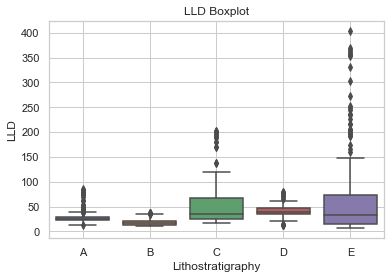

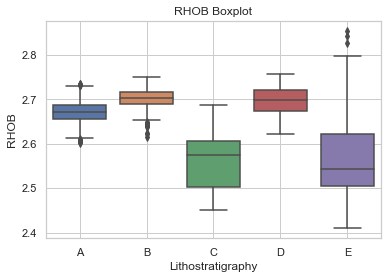

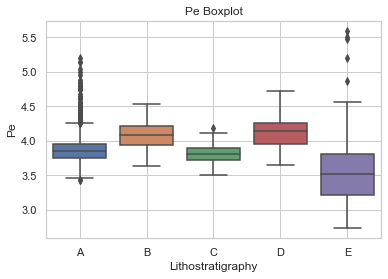

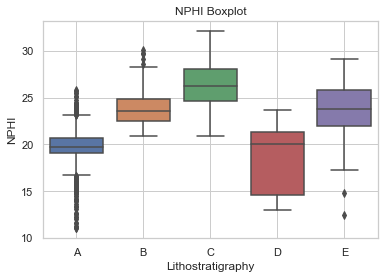

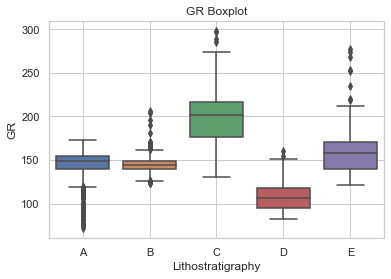

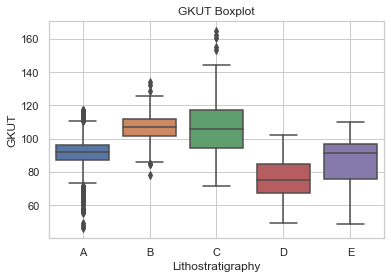

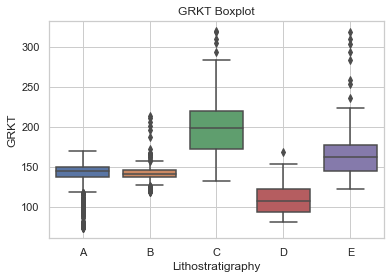

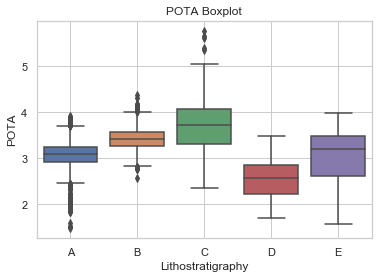

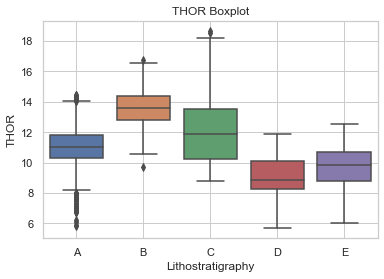

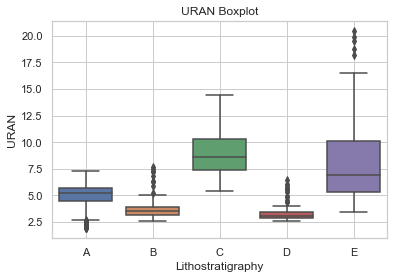

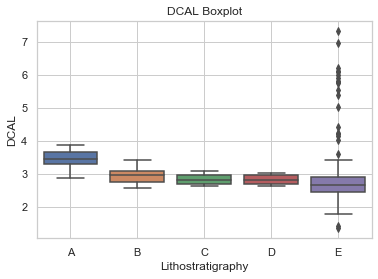

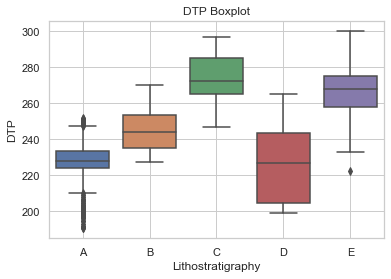

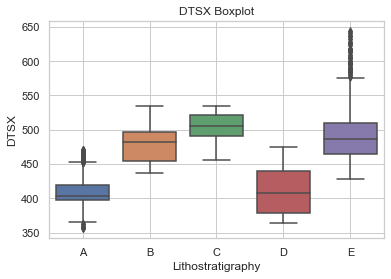

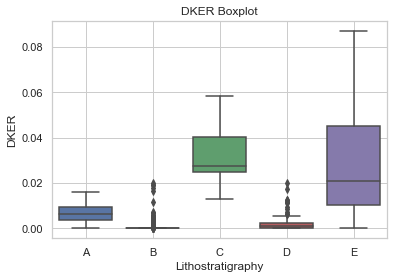

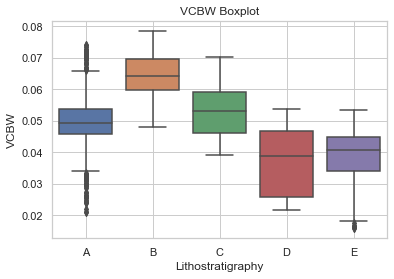

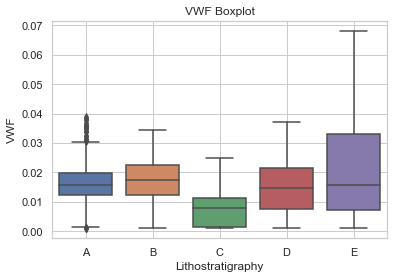

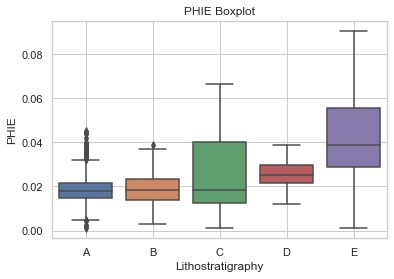

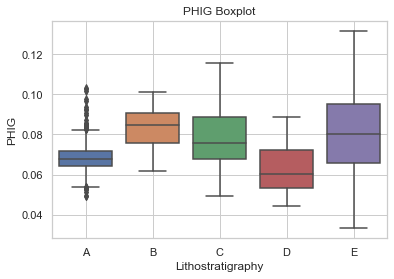

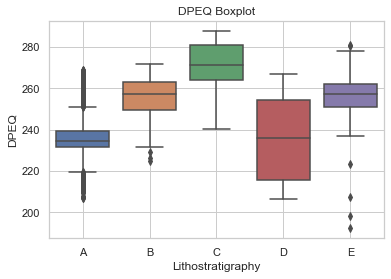

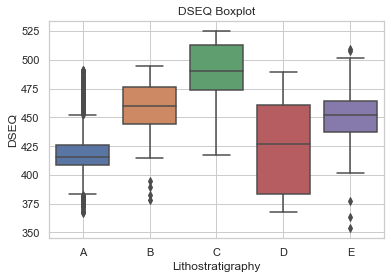

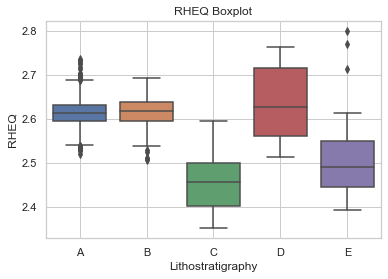

<Figure size 432x288 with 0 Axes>

In [2]:
def boxplot(features):
    for x in features:
        sns.set(style="whitegrid")
        sns.boxplot(x = dataPCA['Litostratygrafia'], y = dataPCA[x])
        plt.grid(True)
        plt.xlabel('Lithostratigraphy')
        plt.title(x + ' Boxplot')
        plt.figure()

boxplot(features)

C:\Users\Kacpero\Anaconda3\envs\orange3\lib\site-packages\seaborn\axisgrid.py:1270: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

C:\Users\Kacpero\Anaconda3\envs\orange3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



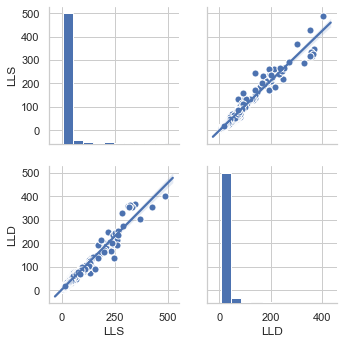

<Figure size 432x288 with 0 Axes>

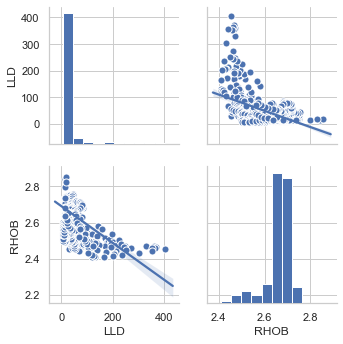

<Figure size 432x288 with 0 Axes>

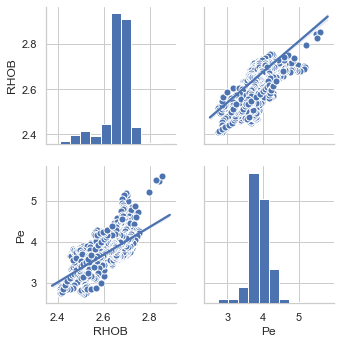

<Figure size 432x288 with 0 Axes>

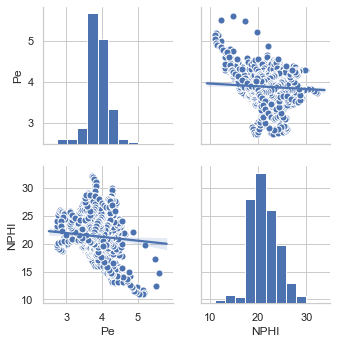

<Figure size 432x288 with 0 Axes>

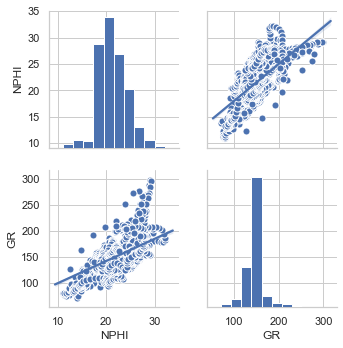

<Figure size 432x288 with 0 Axes>

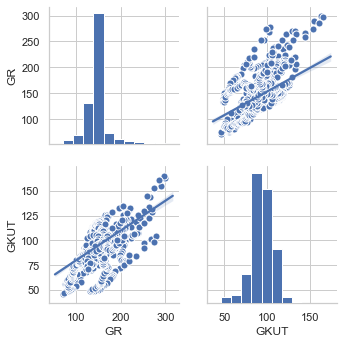

<Figure size 432x288 with 0 Axes>

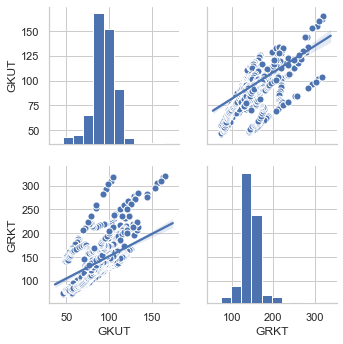

<Figure size 432x288 with 0 Axes>

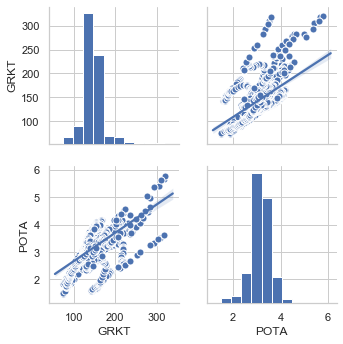

<Figure size 432x288 with 0 Axes>

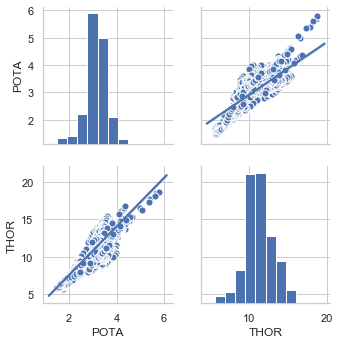

<Figure size 432x288 with 0 Axes>

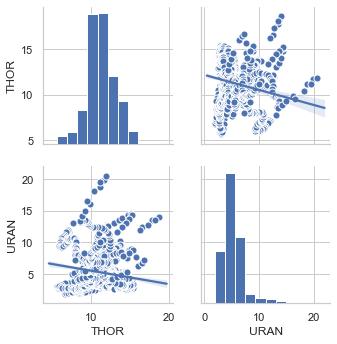

<Figure size 432x288 with 0 Axes>

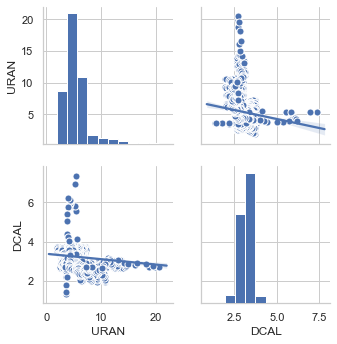

<Figure size 432x288 with 0 Axes>

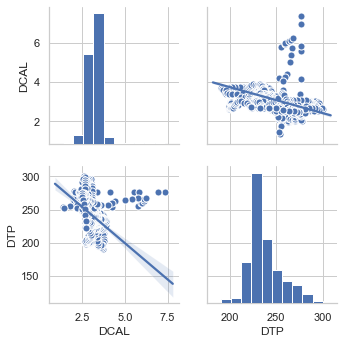

<Figure size 432x288 with 0 Axes>

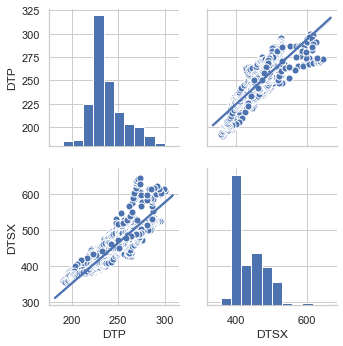

<Figure size 432x288 with 0 Axes>

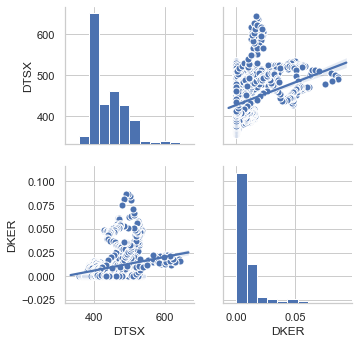

<Figure size 432x288 with 0 Axes>

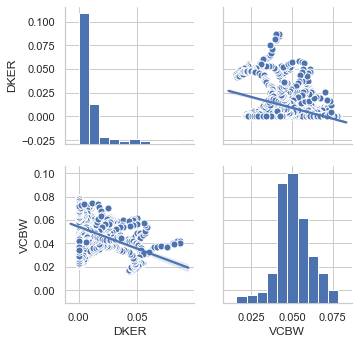

<Figure size 432x288 with 0 Axes>

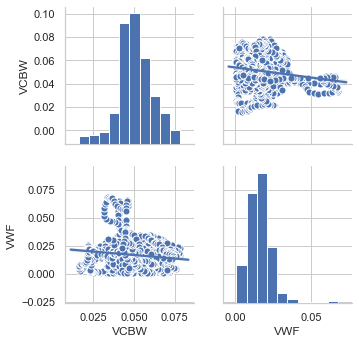

<Figure size 432x288 with 0 Axes>

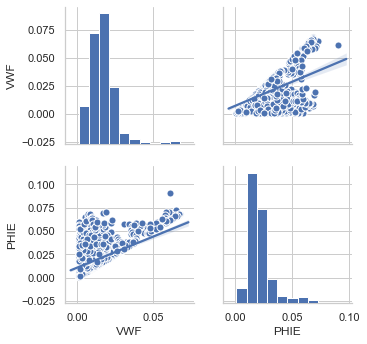

<Figure size 432x288 with 0 Axes>

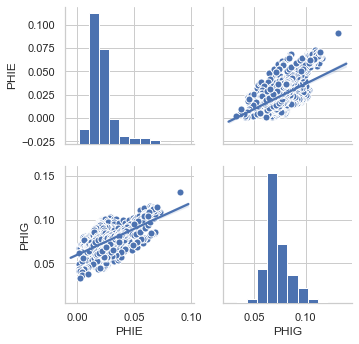

<Figure size 432x288 with 0 Axes>

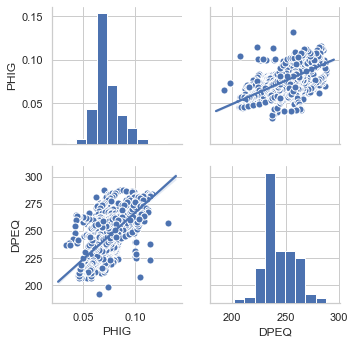

<Figure size 432x288 with 0 Axes>

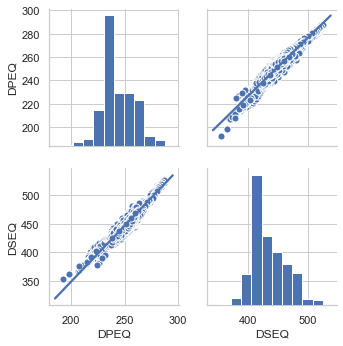

<Figure size 432x288 with 0 Axes>

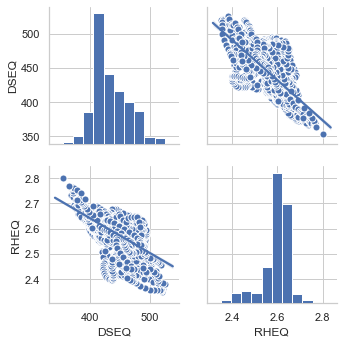

<Figure size 432x288 with 0 Axes>

In [3]:
def pairplot(features):
    for i in range(1,len(features)):
        g = sns.pairplot(dataPCA.iloc[:,i:i+2],  kind = "reg", palette="GnBu_d")
        g.map_offdiag(plt.scatter, s=50, edgecolor = "white")
        plt.figure()

pairplot(features)

In [4]:
from sklearn.preprocessing import StandardScaler
#Feature Standardization
x_std = StandardScaler().fit_transform(x)
def covarianceMatrix(xStd):
    mean_vec = np.mean(x_std, axis=0)
    cov_mat = (x_std - mean_vec).T.dot((x_std - mean_vec))/(x_std.shape[0]-1)
    return cov_mat

covarianceMatrix(x_std)

array([[ 1.00040339,  0.98290132, -0.58835329, -0.27526803,  0.04894495,
         0.26514309, -0.31104552,  0.30956645, -0.26122614, -0.33431763,
         0.53930354, -0.16301342,  0.24477273,  0.07709877,  0.63721266,
        -0.40103516, -0.37176484,  0.1398151 , -0.23055674,  0.09179482,
         0.04484872, -0.47899908],
       [ 0.98290132,  1.00040339, -0.55666776, -0.24559916,  0.03929487,
         0.22678546, -0.32584436,  0.27466534, -0.27895191, -0.34412679,
         0.50722456, -0.1599375 ,  0.23008983,  0.0637807 ,  0.61108249,
        -0.40547773, -0.39538745,  0.11985024, -0.25375938,  0.08609086,
         0.04132884, -0.45852687],
       [-0.58835329, -0.55666776,  1.00040339,  0.67266696, -0.31668915,
        -0.51075297,  0.15334551, -0.56666163,  0.03735501,  0.27237116,
        -0.73160284,  0.26625705, -0.60868416, -0.3854146 , -0.84861761,
         0.42099175,  0.07483144, -0.5238596 , -0.1196607 , -0.39224865,
        -0.30982916,  0.88344606],
       [-0.27526803

In [5]:
#Eigendecomposition of the standarized data based on the correlation matrix
def correlationMatrix(x_std):
    cor_mat1 = np.corrcoef(x_std.T)
    return cor_mat1
correlationMatrix(x_std)

array([[ 1.        ,  0.98250499, -0.58811605, -0.27515703,  0.04892522,
         0.26503618, -0.3109201 ,  0.30944162, -0.26112081, -0.33418282,
         0.53908607, -0.16294769,  0.24467404,  0.07706768,  0.63695572,
        -0.40087346, -0.37161494,  0.13975873, -0.23046377,  0.09175781,
         0.04483063, -0.47880594],
       [ 0.98250499,  1.        , -0.5564433 , -0.24550012,  0.03927903,
         0.22669401, -0.32571298,  0.27455459, -0.27883943, -0.34398803,
         0.50702004, -0.15987301,  0.22999705,  0.06375498,  0.61083609,
        -0.40531423, -0.39522802,  0.11980191, -0.25365705,  0.08605614,
         0.04131217, -0.45834198],
       [-0.58811605, -0.5564433 ,  1.        ,  0.67239572, -0.31656145,
        -0.51054702,  0.15328367, -0.56643314,  0.03733995,  0.27226134,
        -0.73130784,  0.26614968, -0.60843872, -0.38525919, -0.84827543,
         0.42082199,  0.07480127, -0.52364837, -0.11961245, -0.39209048,
        -0.30970423,  0.88308984],
       [-0.27515703

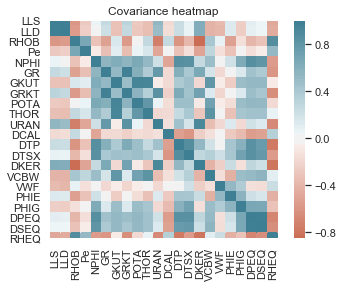

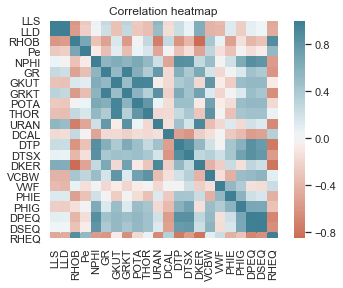

<Figure size 432x288 with 0 Axes>

In [6]:
#Heatmaps
def heatmap(x,title):
    ax = sns.heatmap(x,center=0, cmap=sns.diverging_palette(20,220, n=200),square=True, yticklabels=features, xticklabels=features)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.title(title + ' heatmap')
    plt.grid(b=True)
    plt.figure()
    
heatmap(covarianceMatrix(x_std),"Covariance")
heatmap(correlationMatrix(x_std),"Correlation")

Eigendecomposition based on the covariance matrix 

Eigenvectors 
[[-9.51655163e-02 -3.03372353e-01  1.05270717e-01 -3.12247805e-01
  -1.87202277e-01 -4.78326116e-01 -5.49547846e-02 -6.02277189e-02
   1.01500366e-01 -4.90026488e-02  7.56408600e-02 -2.41999667e-02
   6.15402256e-02  2.05252419e-02  1.23104499e-02  3.97799534e-02
  -1.16571886e-01 -6.85492974e-01  1.06659922e-01 -4.47326742e-03
   9.58325950e-04  1.55741308e-04]
 [-8.63541771e-02 -2.99900266e-01  1.05791161e-01 -3.44904036e-01
  -1.82292699e-01 -4.66848142e-01 -4.74126966e-02 -7.75531342e-02
   3.66761206e-02 -4.02612690e-02  9.59152819e-02 -4.58337497e-02
  -8.63458187e-02 -5.20567533e-02 -1.37508256e-02 -9.42304796e-02
   1.49477148e-01  6.68039072e-01 -1.04126063e-01  6.95813487e-03
  -1.03482013e-03 -2.35571537e-04]
 [ 2.15302909e-01  2.85468132e-01  8.07112246e-02 -8.84513728e-02
  -1.83095234e-01  3.66042787e-02  5.48459708e-02 -2.15222860e-01
   1.15476165e-01 -3.26910153e-01 -1.26421078e-01 -5.75584768e-02
  -5.3

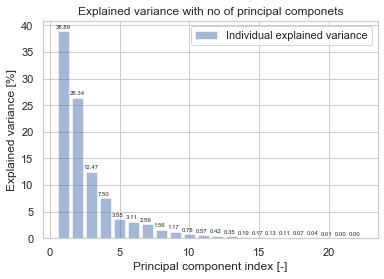

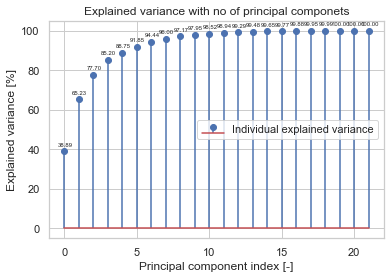

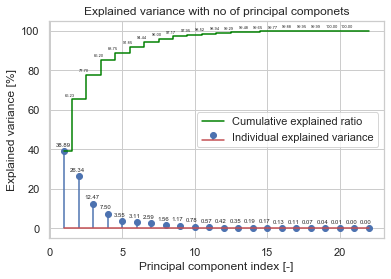

In [11]:
#Selecting Principal Components
#Eigendecomposition
def eigendecomp(matrix):
    eig_vals, eig_vecs = np.linalg.eig(matrix)
    print('Eigenvectors \n%s' %eig_vecs)
    print('Eigenvalues \n%s' %eig_vals)
    #Make a list of (eigenvalue, eigenvector) tuples
    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
    #Sort the tuples from highest to lowest
    eig_pairs.sort()
    eig_pairs.reverse()
    #How many principal components are we going to choose for our new feature subspace?
    tot = sum(eig_vals)
    var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)]
    cum_var_exp = np.cumsum(var_exp)
    print('Variance explained \n\n%s'%var_exp)
    print('Variance explained \n\n%s'%cum_var_exp)
    #Barplot
    singlePlot(var_exp,'Explained variance with no of principal componets',"bar",'Principal component index [-]',
               'Explained variance [%]','Individual explained variance','Individual explained variance')
    singlePlot(cum_var_exp, 'Explained variance with no of principal componets',"stem",'Principal component index [-]',
               'Explained variance [%]','Individual explained variance','Individual explained variance')
    combinedPlots(var_exp,cum_var_exp,'Explained variance with no of principal componets','Principal component index [-]','Explained variance [%]',
                  'Individual explained variance','Cumulative explained ratio')
    return eig_pairs
        
print('Eigendecomposition based on the covariance matrix \n')
eigPairs = eigendecomp(covarianceMatrix(x_std))
#print('Eigendecomposition based on the correlation matrix \n')
#eigendecomp(correlationMatrix(x_std))

In [12]:
def singlePlot(data,title,plottype,xlabel,ylabel,label_1,label_2):
    ticks=np.arange(22)
    if plottype == "bar":
        plt.bar(range(1,23), data, alpha=0.5,
           align='center', label=label_1)
        xytext=(6,3)
        ha='left'
    elif plottype == "stem":
        plt.stem(data, use_line_collection=True, label=label_2)
        xytext=(1,5)
        ha='center'
    y_postest = np.arange(len(data))
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    for x,y in zip(y_postest,data):
        label = "{:.2f}".format(y)
        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=xytext, # distance from text to points (x,y)
                     ha=ha,
                    fontsize=6)
    plt.legend(loc='best')
    plt.grid(True)
    plt.title(title)
    plt.figure()

In [13]:
def combinedPlots(data_1,data_2,title,xlabel,ylabel,label_1,label_2):
    plt.stem(range(1,23), data_1, label=label_1,use_line_collection=True)
    plt.step(range(1,23), data_2, where='mid',
        label=label_2, color='green')
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.legend(loc='best')
    plt.grid(True)
    plt.title(title)
    y_postest = np.arange(len(data_1))
    for x,y in zip(y_postest,data_1):

        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(6,5), # distance from text to points (x,y)
                     ha='left',
                    fontsize=6)

    x_steptest = np.arange(len(data_2))
    for i,j in zip(x_steptest,data_2[1:21]):

        label = "{:.2f}".format(j)

        plt.annotate(label, # this is the text
                     (i,j), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(15,3), # distance from text to points (x,y)
                     ha='left',
                    fontsize=4)

In [15]:
#8 components explain over 95% of variance, so we can reduce the feature space to 8 dimensions
[i[0] for i in eigPairs]

[8.559073617191537,
 5.796253637008612,
 2.745600323726712,
 1.6497043487417675,
 0.7817603387285312,
 0.6834117023022598,
 0.5697253522672342,
 0.3426508907207577,
 0.25778224572459607,
 0.17069578098425903,
 0.12628732408976787,
 0.09191020943548624,
 0.07715245650200084,
 0.041466614420060575,
 0.03744451343680322,
 0.027861783489649596,
 0.023825788256436917,
 0.014492711001652189,
 0.009106394410634763,
 0.0026610798828081675,
 6.762528341734009e-06,
 6.713380778745638e-07]

In [16]:
matrix_w_8 = np.hstack((eigPairs[0][1][:, np.newaxis], eigPairs[1][1][:, np.newaxis], eigPairs[2][1][:, np.newaxis], eigPairs[3][1][:, np.newaxis], eigPairs[4][1][:, np.newaxis], eigPairs[5][1][:, np.newaxis], eigPairs[6][1][:, np.newaxis], eigPairs[7][1][:, np.newaxis]))
matrix_w_8

array([[-0.09516552, -0.30337235,  0.10527072, -0.3122478 , -0.18720228,
        -0.47832612, -0.05495478, -0.06022772],
       [-0.08635418, -0.29990027,  0.10579116, -0.34490404, -0.1822927 ,
        -0.46684814, -0.0474127 , -0.07755313],
       [ 0.21530291,  0.28546813,  0.08071122, -0.08845137, -0.18309523,
         0.03660428,  0.05484597, -0.21522286],
       [ 0.11518897,  0.2023277 ,  0.06830527, -0.32990986, -0.45844008,
         0.18970944,  0.6585728 ,  0.09796474],
       [-0.29714116,  0.12499629, -0.05252803, -0.08865718, -0.06361968,
         0.01145718,  0.11721234, -0.17627282],
       [-0.26102188, -0.05353559,  0.28538195,  0.27100839, -0.14630145,
         0.02323369,  0.07750661,  0.03944838],
       [-0.18667019,  0.29814681,  0.19600556,  0.12597612, -0.07478992,
        -0.1933337 , -0.07939626,  0.17796974],
       [-0.2721577 , -0.07433625,  0.26716042,  0.2432294 , -0.17429953,
         0.05882252,  0.07626972,  0.03286586],
       [-0.2063705 ,  0.25377996

In [17]:
#Dot product of arrays
Y=x_std.dot(matrix_w_8)
Y

array([[ 2.44593112,  0.72125177, -2.69098305, ..., -1.35392244,
        -0.14050567,  0.34697179],
       [ 2.56018152,  0.609756  , -2.70253709, ..., -1.36954332,
         0.09011844,  0.29159242],
       [ 2.99614181,  0.33650033, -2.93150622, ..., -1.20638943,
         0.30690178,  0.16663761],
       ...,
       [ 0.66828224,  1.55372102, -0.61107077, ...,  0.34210487,
         4.45962047,  2.98493481],
       [ 4.31869999,  0.45499786, -0.24326334, ...,  1.62428165,
         3.48388965,  0.83862726],
       [ 6.47234365, -0.42314413, -0.93238196, ...,  1.8097529 ,
         2.75296266,  0.30967915]])

In [18]:
#Constructing a DataFrame
y_pd = pd.DataFrame(dataPCA.loc[:,['Litostratygrafia']].values, columns=['Lithostratigraphy'])
y_pd

#Concatenate dataframes
principalData_8 = pd.DataFrame(data = Y, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])
finalData_8 = pd.concat([y_pd,principalData_8], axis = 1)
#Representing final matrix with 8 principal components
finalData_8

,Lithostratigraphy,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,A,2.445931,0.721252,-2.690983,1.690674,-0.598041,-1.353922,-0.140506,0.346972
1,A,2.560182,0.609756,-2.702537,1.660667,-0.316358,-1.369543,0.090118,0.291592
2,A,2.996142,0.336500,-2.931506,1.321536,-0.112199,-1.206389,0.306902,0.166638
3,A,3.576707,0.135606,-2.867927,0.884910,-0.103499,-0.959269,0.555409,0.116296
4,A,4.256470,-0.053928,-3.003815,0.504150,-0.225193,-0.770516,0.913108,0.054407
...,...,...,...,...,...,...,...,...,...
2475,E,-3.597260,0.907770,-1.525037,1.718685,-3.791566,0.459744,3.934073,3.595806
2476,E,-1.856901,1.376989,-1.125243,1.940536,-5.356624,0.211859,4.523498,3.620506
2477,E,0.668282,1.553721,-0.611071,1.843997,-6.778840,0.342105,4.459620,2.984935
2478,E,4.318700,0.454998,-0.243263,0.658532,-6.843162,1.624282,3.483890,0.838627


In [19]:
#Dictionary with Principal Components column names
pc_d = {
    '1' : 'PC1',
    '2' : 'PC2',
    '3' : 'PC3',
    '4' : 'PC4',
    '5' : 'PC5',
    '6' : 'PC6',
    '7' : 'PC7',
    '8' : 'PC8'
}
#Principal Components plots
def PCplot(PC1,PC2,savefig):
    if(PC1 in pc_d and PC2 in pc_d):
        pc1 = pc_d.get(PC1)
        pc2 = pc_d.get(PC2)
    else:
        return -1
    
    fig = plt.figure(figsize = (10,10))
    ax=fig.add_subplot(1,1,1)
    ax.set_xlabel('Principal Component no. {firstPC} [-]'.format(firstPC=PC1), fontsize = 14)
    ax.set_ylabel('Principal Component no. {secondPC} [-]'.format(secondPC=PC2), fontsize = 14)
    ax.grid(True)
    
    ax.set_title('{firstPC} vs. {secondPC}'.format(firstPC=pc1, secondPC=pc2), fontsize = 16)
    targets = ['A','B','C','D','E']
    colors = ['r','g','b', 'c', 'm']

    for target, color in zip(targets, colors):
        indicesToKeep = finalData_8['Lithostratigraphy'] == target
        ax.scatter(finalData_8.loc[indicesToKeep, pc1],
                   finalData_8.loc[indicesToKeep, pc2],
                   c = color,
                   s = 50)
        ax.legend(targets, title="Lithostratigraphy")

    plt.axis('equal')
    if(savefig == True):
        plt.savefig('TestPerformedWell.png', dpi=200, quality=100)
        print("Image has been saved!")
    plt.figure()

Image has been saved!


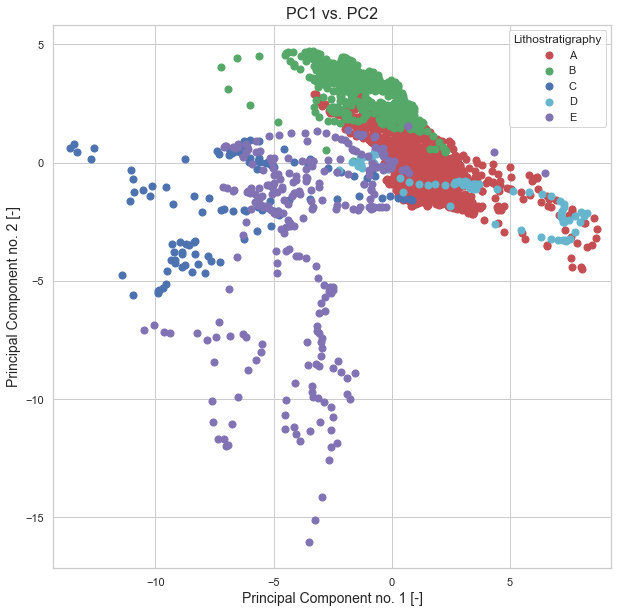

<Figure size 432x288 with 0 Axes>

In [20]:
#Here we can choose two particular principal components and see how they contribute to each other
PCplot('1','2',True)

In [21]:
#Logisitc Regression on PCA algorithm from scikit-learn
#splitting on training and test set
from sklearn.model_selection import train_test_split
#20% of data will be for test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [22]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
#fit only on Training data  
sc.fit(x_train)  
x_train=StandardScaler().fit_transform(x_train)
x_test=StandardScaler().fit_transform(x_test)

In [24]:
import time
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score
# Make an instance of the Model for PCA data
# We choose 95% because it is 8 components, calculated in the prevoius example
pca = PCA(.95)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [35]:
def logisticRegressionModel(pca,solver, maxIteration):
    #Defining training and test data
    if(pca == True):
        xTrain = x_train_pca
        xTest = x_test_pca
    else:
        xTrain = x_train
        xTest = x_test
        
    #start to measure the time
    start_time = time.time()
    #Logistic Regression model
    from sklearn.linear_model import LogisticRegression
    # all parameters not specified are set to their defaults
    # default solver is incredibly slow which is why it was changed to 'lbfgs'
    logisticRegr = LogisticRegression(solver = solver, max_iter=maxIteration, multi_class='auto')
    logisticRegr.fit(xTrain, y_train)
    logisticRegr.predict(xTest)
    logisticRegr.score(xTest, y_test)
    report = classification_report(y_test, logisticRegr.predict(xTest))
    if(pca == True):
        print("------------------------Report for data processed by the PCA algorithm------------------------")
    else:
        print("------------------------Report for original data------------------------")
    print('Data Shape')
    print('X_train shape',xTrain.shape)  
    print('X_test shape',xTest.shape)   
    print('y_train shape',xTrain.shape)  
    print('y_test shape',xTest.shape)
    print("Accuraccy: %s" %logisticRegr.score(xTest, y_test))
    print("Time elapsed: %s seconds" % (time.time() - start_time))
    print("Number of iterations: %s " % logisticRegr.n_iter_) 
    print('F1 score:',f1_score(y_test,logisticRegr.predict(xTest),average='weighted'))   
    print('Recall:',recall_score(y_test,logisticRegr.predict(xTest),average='weighted'))   
    print('Precision:',precision_score(y_test,logisticRegr.predict(xTest),average='weighted')) 
    print("------------------------Classification Report------------------------")
    print(report)
    print('\n confussion matrix:\n',confusion_matrix(y_test,logisticRegr.predict(xTest)))

In [38]:
#Enter "True" if you want to use data processed by PCA algorithm
# "False" if original Data
logisticRegressionModel(True,'lbfgs', 2000)

------------------------Report for data processed by the PCA algorithm------------------------
Data Shape
X_train shape (1736, 8)
X_test shape (744, 8)
y_train shape (1736, 8)
y_test shape (744, 8)
Accuraccy: 0.928763440860215
Time elapsed: 0.2546083927154541 seconds
Number of iterations: [100] 
F1 score: 0.9284703728101692
Recall: 0.928763440860215
Precision: 0.9285069578264874
------------------------Classification Report------------------------
              precision    recall  f1-score   support

           A       0.96      0.96      0.96       472
           B       0.90      0.92      0.91       134
           C       0.82      0.86      0.84        36
           D       0.78      0.70      0.74        20
           E       0.88      0.84      0.86        82

    accuracy                           0.93       744
   macro avg       0.87      0.86      0.86       744
weighted avg       0.93      0.93      0.93       744


 confussion matrix:
 [[454  14   0   1   3]
 [ 10 123   1 

In [ ]:
#Script will be updated with new features and modification soon!